# 2 geopandas 0.11版本重要新特性一览

In [1]:
import time
import geopandas as gpd
gpd.__version__

'0.11.0'

## 2.1 更快的矢量文件读写

- **driver='fiona'**

In [2]:
start = time.time()

gdf = gpd.read_file('./Guangzhou/Guangzhou.shp')

print('耗时：{}s'.format(round(time.time() - start, 2)))

耗时：65.14s


- **engine='pyogrio'**

In [3]:
start = time.time()

gdf = gpd.read_file('./Guangzhou/Guangzhou.shp', engine='pyogrio')

print('耗时：{}s'.format(round(time.time() - start, 2)))

耗时：13.59s


- **driver='fiona'**

In [4]:
start = time.time()

gdf.to_file('./Guangzhou/Guangzhou_copy.shp')

print('耗时：{}s'.format(round(time.time() - start, 2)))

耗时：244.04s


- **engine='pyogrio'**

In [5]:
start = time.time()

gdf.to_file('./Guangzhou/Guangzhou_copy.shp', engine='pyogrio')

print('耗时：{}s'.format(round(time.time() - start, 2)))

耗时：51.5s


## 2.2 新增高性能矩形裁切API

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

# 计算得到目标GeoDataFrame范围
minx, miny, maxx, maxy = gdf.total_bounds

def generate_random_rectangle(minx, miny, maxx, maxy):
    '''
    研究范围内随机取得10000米边长矩形
    '''
    np.random.seed(3)
    random_rectangle = [
        np.random.uniform(minx, maxx - 10000),
        np.random.uniform(miny, maxy - 10000)
    ]

    return [
        *random_rectangle,
        random_rectangle[0] + 10000,
        random_rectangle[1] + 10000,
    ]

In [7]:
# 随机矩形范围裁切
random_rectangle = generate_random_rectangle(minx, miny, maxx, maxy)
clip_by_rect_result = gdf.clip_by_rect(
    *random_rectangle
)
clip_by_rect_result

0          GEOMETRYCOLLECTION EMPTY
1          GEOMETRYCOLLECTION EMPTY
2          GEOMETRYCOLLECTION EMPTY
3          GEOMETRYCOLLECTION EMPTY
4          GEOMETRYCOLLECTION EMPTY
                     ...           
1207350    GEOMETRYCOLLECTION EMPTY
1207351    GEOMETRYCOLLECTION EMPTY
1207352    GEOMETRYCOLLECTION EMPTY
1207353    GEOMETRYCOLLECTION EMPTY
1207354    GEOMETRYCOLLECTION EMPTY
Length: 1207355, dtype: geometry

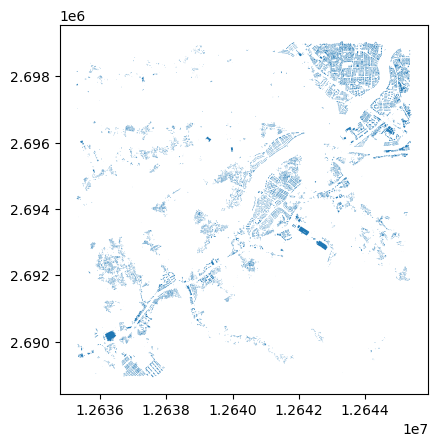

In [8]:
gdf.loc[~clip_by_rect_result.is_empty, :].plot()
plt.show();

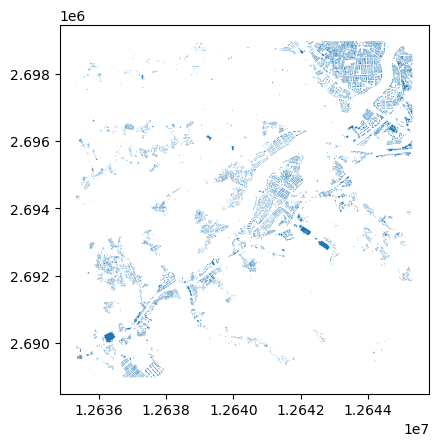

In [9]:
gdf.clip(mask=random_rectangle).plot()
plt.show();

## 2.3 正确读写GIS文件中的日期时间字段

In [10]:
import pandas as pd

(
    gdf
    .sample(n=100)
    .assign(日期时间示例=pd.Timestamp('2022-01-01 12:00:00'))
    .to_file('./datetime_demo.geojson')
)

(
    gpd
    .read_file('./datetime_demo.geojson')
    .dtypes
)

Shape_Leng           float64
Shape_Area           float64
area                 float64
日期时间示例        datetime64[ns]
geometry            geometry
dtype: object